In [ ]:
# Importing basic packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
# Importing scikit and related packages
from sklearn.datasets import make_blobs

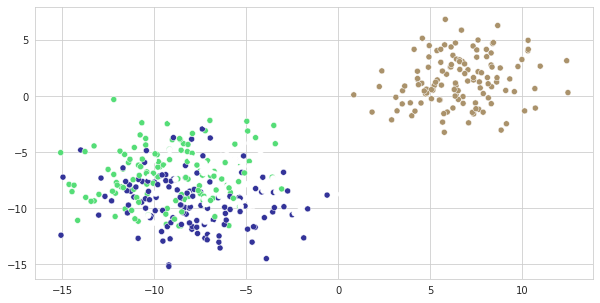

In [56]:
# Creating the dataset
dataset = make_blobs(centers=4, random_state=687, n_samples=500, cluster_std=2.4)
x, y = dataset

# Now let us plot this data
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x[:, 0], y=x[:, 1], c=y, cmap=plt.cm.terrain)
plt.show()

It can be seen that the datapoints can be classified into multiple classes. 

## **Decision Tree Classifier**

In [ ]:
# Importing the classifier
from sklearn.tree import DecisionTreeClassifier

In [76]:
# Function to visuaize the decision tree for each model
def visualize_classifier(model, X, y, ax=None, cmap=plt.cm.Dark2):
    plt.figure(figsize=(10, 5))
    ax = plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

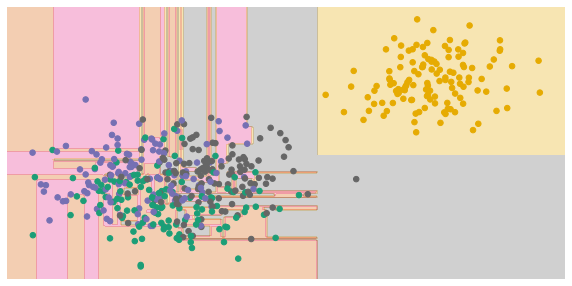

In [77]:
# Visulizing the DecisionTreeClassifier
visualize_classifier(DecisionTreeClassifier(), x, y)

## **Random Forest**

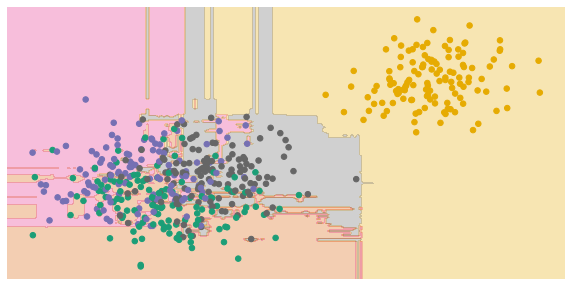

In [78]:
# Importing the model
from sklearn.ensemble import RandomForestClassifier

# Defining the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=786)

# Visualizing the classifier
visualize_classifier(rf_classifier, x, y)